# `AMAZON BOOKS CURATION AND ANALYSIS`

AUTHOR: <U>FLORENCE NGUUNI </U>

![AMAZON](index.jpeg)

### `INTRODUCTION`

As the digital revolution continues to transform consumer habits, nowhere is this more evident than in the realm of book sales on Amazon, the preeminent leader in e-commerce. In a journey that spans a dynamic decade from 2009 to 2019, I embark on a captivating exploration of literary consumption. This project is not merely an analysis of sales; it's a chronicle of cultural shifts, a narrative of changing tastes, and a reflection of the digital zeitgeist. By juxtaposing the multitude of books presented for sale with the frequency of actual purchases, I aim to uncover the stories behind what readers choose to cherish, consume, and collect.

## `DATA CURATION`

In [1]:

#impot libraries
import pandas as pd
from requests import get
from time import sleep
from random import randint
from selenium import webdriver
import numpy as np
from bs4 import BeautifulSoup
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# The amazon url

books_url = 'https://www.amazon.com/s?i=stripbooks&bbn=283155&rh=n%3A283155&s=review-count-rank&dc&Adv-Srch-Books-Submit.x=30&Adv-Srch-Books-Submit.y=21&qid=1602339864&unfiltered=1&ref=sr_ex_n_1'

In [ ]:
#Here, we want to get the link for all categories

driver = webdriver.Chrome("C:/Users/FLORENCE/Downloads/chromedriver_win32/chromedriver.exe")

# Navigate to the specified URL
driver.get(books_url)

# Introduce a random sleep to simulate human-like behavior and avoid being detected as a bot
sleep(randint(5, 15))

# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Extract all href attributes from anchor (a) tags and store them in category_urls
category_urls = [item.get("href") for item in soup.find_all("a")]

#Remove duplicates and nan values

urls = list(dict.fromkeys(category_urls))
urls = list(filter(None, urls)) 

In [ ]:
# Filter out URLs that start with '/s?i=stripbooks'
urls = [x for x in urls if x.startswith('/s?i=stripbooks')]

# Remove all links that end with 'browse-bin_1'
urls = [x for x in urls if not x.endswith('browse-bin_1')]

# Prefix each URL with the base string 'https://www.amazon.com/'
string = 'https://www.amazon.com/'
ulr_list = [string + s for s in urls]


    

In [ ]:
# Select the first 32 links from the final_list, as they are the ones to be recorded

ulr_list =ulr_list[:32]

In [ ]:
# Initialize an empty list to store the page URLs
page_list = []

# Loop through each URL in the final_urls list
for url in ulr_list:
    # Set up a new Chrome WebDriver for each URL
    driver = webdriver.Chrome("C:/Users/FLORENCE/Downloads/chromedriver_win32/chromedriver.exe")
    
    # Navigate to the current URL
    driver.get(url)  
    
    # Introduce a random sleep to simulate human-like behavior and avoid being detected as a bot
    sleep(randint(5, 15))
    
    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Extract all href attributes from anchor (a) tags and remove duplicates
    page_urls = list(dict.fromkeys([item.get("href") for item in soup.find_all("a")]))
    
    # Remove any empty strings from the list of URLs
    page_urls = list(filter(None, page_urls)) 
    
    # Filter URLs that start with '/s?i=stripbooks'
    url_final = [x for x in page_urls if x.startswith('/s?i=stripbooks')]
    
    # Remove URLs that end with 'hi_1'
    url_final = [x for x in url_final if not x.endswith('hi_1')]
    
    # Filter URLs that end with specified prefixes ('sr_pg_1', 'sr_pg_2', 'sr_pg_3')
    prefixes = ('sr_pg_1', 'sr_pg_2', 'sr_pg_3')
    url_final = [x for x in url_final if x.endswith(prefixes)]
    
    # Prefix each URL with 'https://www.amazon.com/' and store in final_list
    string = 'https://www.amazon.com/'
    final_url = [string + s for s in url_final]
    
    # Select the first 3 links from final_list, as they are the ones to be recorded
    final_pages = final_url[0:3]
    
    # Append the selected page URLs to the page_list
    page_list.append(final_url)


In [ ]:
# Let's convert  to  flat list.
flat_list = []
for sublist in page_list:
    for item in sublist:
        flat_list.append(item)

In [ ]:
# Empty lists to store the data we will extract from the links
titles = []     # To store book titles
authors = []    # To store authors' names
dates = []      # To store publication dates
stars = []      # To store star ratings
ratings = []    # To store customer ratings
prices = []     # To store book prices
categs = []     # To store book categories


In [ ]:
# Iterate through the links in flat_list and collect the wanted data.
for x in flat_list:
        driver = webdriver.Chrome("C:/Users/MAINGATE/Downloads/chromedriver_win32/chromedriver.exe")
        driver.get(x)  
        sleep(randint(2,10))
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        containers = soup.find_all("div", class_ = "sg-col-20-of-24 s-result-item s-asin sg-col-0-of-12 sg-col-28-of-32 sg-col-16-of-20 sg-col sg-col-32-of-36 sg-col-12-of-16 sg-col-24-of-28")
        for container in containers:
            try:
                title1 = container.find("span", class_="a-size-medium a-color-base a-text-normal").text
                titles.append(title1)

                if container.find("div", class_="a-row a-size-base a-color-secondary").find("a", "a-size-base a-link-normal") is None:
                    authors.append(container.find("div", class_="a-row a-size-base a-color-secondary").find_all("span", class_="a-size-base")[2].text)
                elif container.find("div", class_="a-row a-size-base a-color-secondary").find("a", "a-size-base a-link-normal") is not None:
                    author1 = container.find("div", class_="a-row a-size-base a-color-secondary").find("a", "a-size-base a-link-normal").text.strip()
                    authors.append(author1)
                else: authors.append("-")
            except IndexError:
                authors.append('No Author')
                
             
            if container.find("span", "a-size-base a-color-secondary a-text-normal") is not None:
                date1 = container.find("span", "a-size-base a-color-secondary a-text-normal").text
                dates.append(date1)
            else: dates.append("-")

            if container.find("i", "a-icon a-icon-star-small a-star-small-4-5 aok-align-bottom") is not None:
                star1 = float(container.find("i", "a-icon a-icon-star-small a-star-small-4-5 aok-align-bottom").text.replace(" out of 5 stars",""))
                stars.append(star1)
            else: stars.append("-")

            if container.find("div", class_="a-row a-size-small") is not None:
                rating1 = int(container.find("div", class_="a-row a-size-small").find("span", class_="a-size-base").text.replace(",",""))
                ratings.append(rating1)
            else: ratings.append("-")
            
            
            cat = soup.find_all('span', class_="a-size-base a-color-base a-text-bold")[2].text
            categs.append(cat)

In [ ]:
#Combine the lists into a dataframe

df = pd.DataFrame({"Name":titles, "Author":authors, "User Ratings":ratings,"Review":reviews ,'Price':price ,  "Year":year, "Genre":genre})


In [ ]:
df.to_csv('bestseller with categories.csv')

## `DATA CLEANING`

In [3]:

df = pd.read_csv("bestsellers with categories.csv", encoding='latin1')
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
# Checking for null values
df.isnull().sum()


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [7]:
# checking for duplicates

df.duplicated().sum()

0

## `DATA ANALYSIS`

In [8]:
### to get an overview of the dataframe
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
# Highest rated books
highest_rated = df[df['User Rating']==4.9]
highest_rated

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


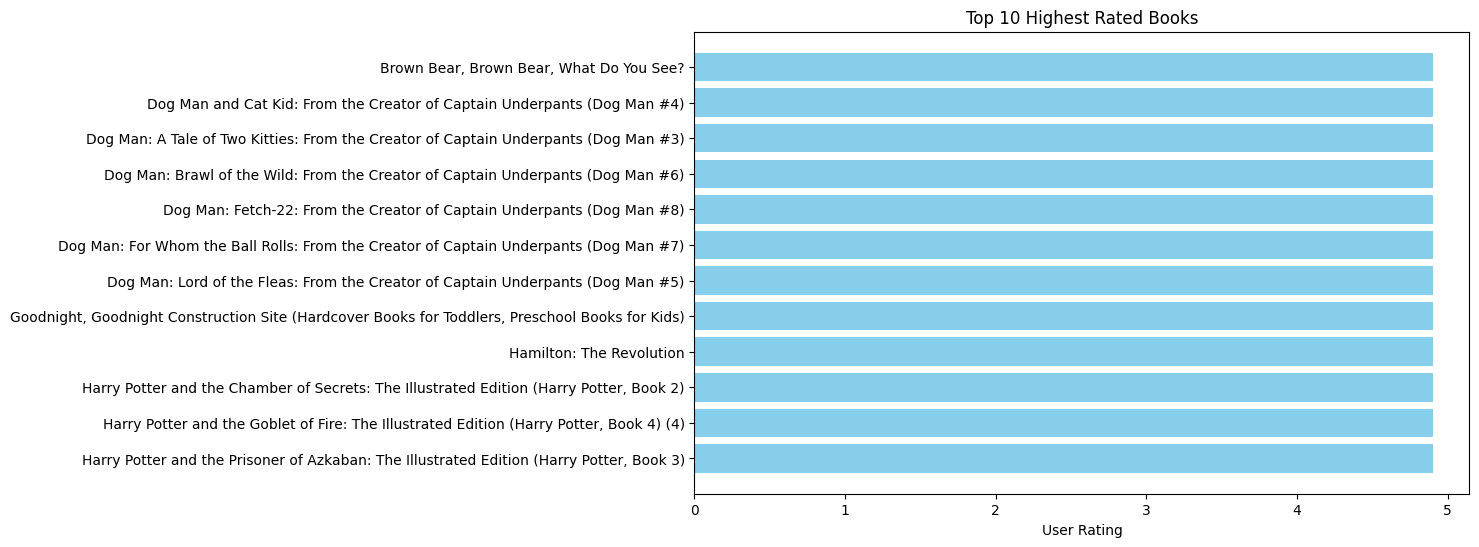

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(highest_rated['Name'].head(15), highest_rated['User Rating'].head(15), color='skyblue')
plt.xlabel('User Rating')
plt.title('Top 10 Highest Rated Books')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rated book at the top
plt.show()

In [22]:
# Most reviewed book

most_review = df.sort_values('Reviews', ascending = False).iloc[:20].Name.unique()
most_review

array(['Where the Crawdads Sing', 'The Girl on the Train', 'Becoming',
       'Gone Girl', 'The Fault in Our Stars', 'The Nightingale: A Novel',
       'Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)',
       'The Martian', 'All the Light We Cannot See', 'The Alchemist'],
      dtype=object)

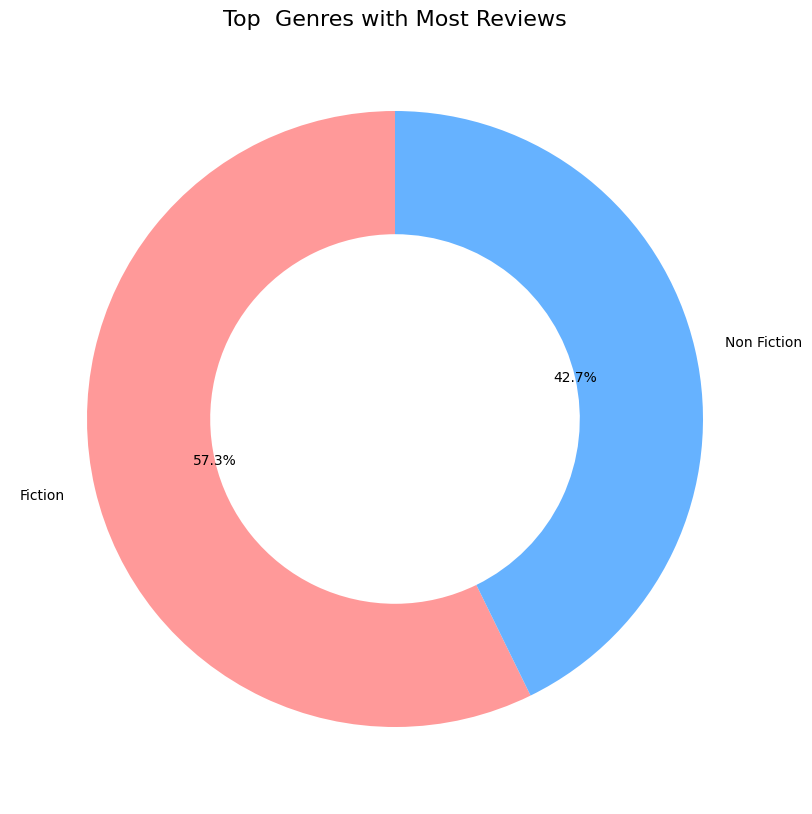

In [31]:
#categories with most reviews
most_review = df.groupby('Genre')['Reviews'].sum().to_frame().reset_index().sort_values('Reviews', ascending = False).iloc[:50]


# Custom color palette for a more attractive visualization
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ff6666', '#c2f0f0', '#ffdb4d']

# Plotting as a donut chart
plt.figure(figsize=(10, 10))
plt.pie(most_review['Reviews'], labels=most_review['Genre'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title('Top  Genres with Most Reviews', fontsize=16)
plt.show()

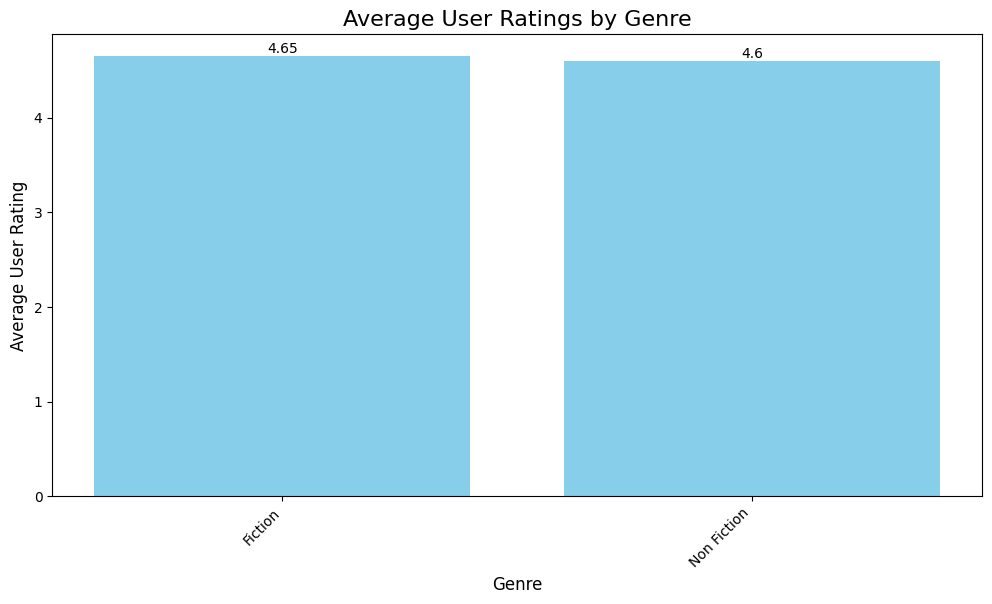

In [33]:
# Group by 'Genre' and calculate the mean of 'User Rating' for each category
average_ratings_by_genre = df.groupby('Genre')['User Rating'].mean().to_frame().reset_index().sort_values('User Rating', ascending=False).reset_index(drop=True)

# Plotting as a bar plot with data labels
plt.figure(figsize=(12, 6))
bars = plt.bar(average_ratings_by_genre['Genre'], average_ratings_by_genre['User Rating'], color='skyblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average User Rating', fontsize=12)
plt.title('Average User Ratings by Genre', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

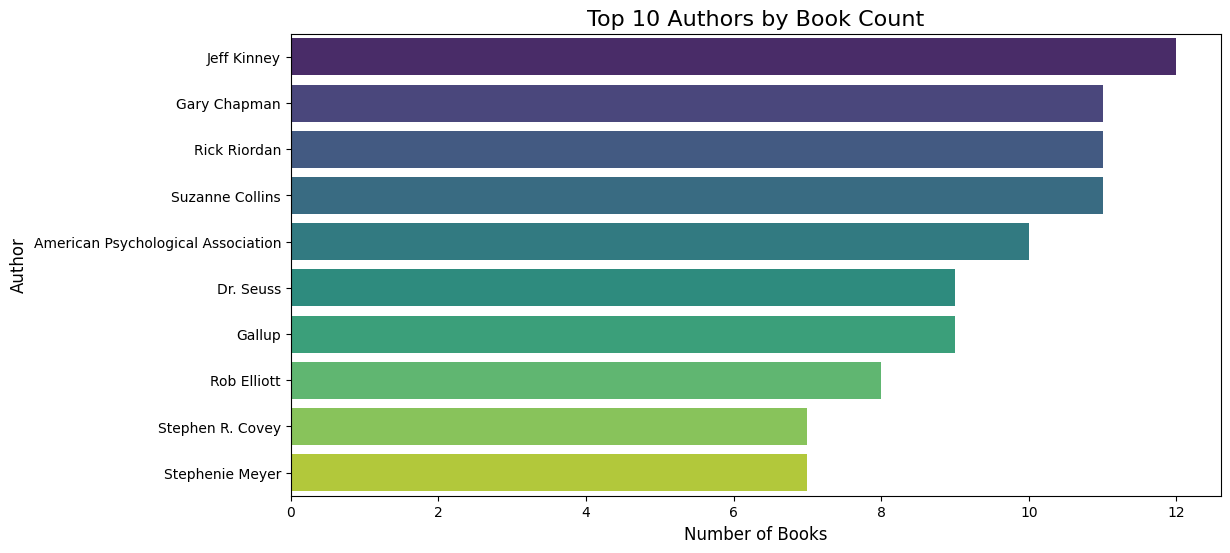

In [34]:
# Top 10 authors by book count
top_authors = df['Author'].value_counts().head(10)

# Plotting as a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.title('Top 10 Authors by Book Count', fontsize=16)
plt.show()

# `Conclusion`

- *Trends in Popular Literature*: A detailed examination of sales data reveals a sustained preference for illustrated and children's literature, as exemplified by the "Dog Man" and "Harry Potter" series. This trend is reflective of the power of strong visual storytelling in capturing the imagination of young readers.
  
- *Engagement and Brand Loyalty*: The high user ratings and engagement for these series indicate not just a passing interest but a deep-seated brand loyalty and satisfaction among consumers, which speaks volumes about the quality and impact of these works.

- *The Fiction Phenomenon*: The preponderance of fiction in user reviews and ratings underscores the genre's ability to connect with readers on a personal level, often serving as a form of escapism or a means to experience new adventures.

- *Educational and Self-Help Literature*: Notable interest in non-fiction, particularly from educational publishers like the American Psychological Association, reveals a dedicated market segment for academic and self-help literature, hinting at the diverse needs of Amazon's consumer base.

# `RECOMENDATIONS`

- *Stock Optimization*: Enhance inventory with bestsellers, focusing on children's and illustrated books, which show a proven track record of high sales and engagement.
  
- *Marketing Focus*: Intensify marketing efforts for fiction genres, capitalizing on their established review counts and user ratings to increase visibility and sales.

- *Diversify Offerings*: Broaden the non-fiction selection, catering to a more diverse audience and addressing the substantial interest in this area.

- *Author Collaborations*: Forge partnerships with beloved authors to offer exclusive releases or special editions, thereby driving sales and creating buzz.

- *Promotional Strategies*: Craft promotions specifically around well-performing children's series, aiming to optimize sales during key buying seasons such as holidays and back-to-school periods.

- *Review-Driven Marketing*: Leverage the active engagement found in fiction reviews to build community-centric marketing campaigns, encouraging further reviews and word-of-mouth recommendations.

- *Expand Educational Content*: Explore opportunities to work with academic publishers to increase the range of educational materials, meeting the demand for quality self-help and academic literature.

- *Author Events*: Plan and execute both virtual and in-person events with top authors to enhance reader engagement, loyalty, and to drive book sales through these interactive experiences.